In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
data=pd.read_csv('covid_19_data.csv',parse_dates = ['ObservationDate','Last Update'])


In [3]:
data['ObservationDate']=pd.to_datetime(data['ObservationDate'])
data['Last Update']=pd.to_datetime(data['Last Update'])

In [4]:
data['Day']=data['ObservationDate'].dt.day
data['Week']=data['ObservationDate'].dt.week
data['Month']=data['ObservationDate'].dt.month
data['WeekDay']=data['ObservationDate'].dt.weekday

In [5]:
data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Day,Week,Month,WeekDay
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0,22,4,1,2
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0,22,4,1,2
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0,22,4,1,2
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0,22,4,1,2
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0,22,4,1,2


In [6]:
data.describe()

,SNo,Confirmed,Deaths,Recovered,Day,Week,Month,WeekDay
count,6722.000000,6722.000000,6722.000000,6722.000000,6722.000000,6722.000000,6722.000000,6722.000000
mean,3361.500000,601.195924,19.855846,226.341267,13.698750,9.191163,2.507438,2.929634
std,1940.618587,4896.332140,204.486922,2556.035202,7.821101,2.255162,0.629830,2.034362
min,1.000000,0.000000,0.000000,0.000000,1.000000,4.000000,1.000000,0.000000
25%,1681.250000,2.000000,0.000000,0.000000,8.000000,8.000000,2.000000,1.000000
50%,3361.500000,13.000000,0.000000,0.000000,13.000000,10.000000,3.000000,3.000000
75%,5041.750000,108.000000,1.000000,11.000000,18.000000,11.000000,3.000000,5.000000
max,6722.000000,67800.000000,3122.000000,56927.000000,31.000000,12.000000,3.000000,6.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6722 entries, 0 to 6721
Data columns (total 12 columns):
SNo                6722 non-null int64
ObservationDate    6722 non-null datetime64[ns]
Province/State     3956 non-null object
Country/Region     6722 non-null object
Last Update        6722 non-null datetime64[ns]
Confirmed          6722 non-null float64
Deaths             6722 non-null float64
Recovered          6722 non-null float64
Day                6722 non-null int64
Week               6722 non-null int64
Month              6722 non-null int64
WeekDay            6722 non-null int64
dtypes: datetime64[ns](2), float64(3), int64(5), object(2)
memory usage: 630.3+ KB


In [8]:
data['Country/Region']

0              Mainland China
1              Mainland China
2              Mainland China
3              Mainland China
4              Mainland China
                ...          
6717                 Guernsey
6718                   Jersey
6719              Puerto Rico
6720    Republic of the Congo
6721               The Gambia
Name: Country/Region, Length: 6722, dtype: object

In [9]:
data[data.Confirmed>0]

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Day,Week,Month,WeekDay
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0,22,4,1,2
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0,22,4,1,2
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0,22,4,1,2
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0,22,4,1,2
5,6,2020-01-22,Guangdong,Mainland China,2020-01-22 17:00:00,26.0,0.0,0.0,22,4,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
6706,6707,2020-03-18,NaN,Togo,2020-03-13 22:22:02,1.0,0.0,0.0,18,12,3,2
6707,6708,2020-03-18,US,US,2020-03-18 19:33:03,1.0,0.0,106.0,18,12,3,2
6708,6709,2020-03-18,West Virginia,US,2020-03-17 23:33:02,1.0,0.0,0.0,18,12,3,2
6709,6710,2020-03-18,Cayman Islands,UK,2020-03-16 14:53:04,1.0,1.0,0.0,18,12,3,2


In [10]:
data=data[data.Confirmed>0]

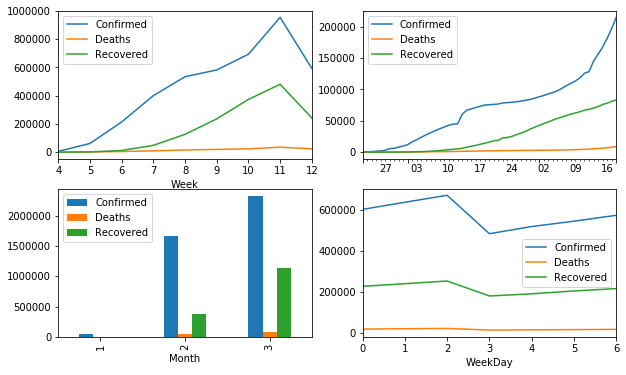

In [11]:
plt.figure(figsize=[10,6])
ax1=plt.subplot(2,2,1)
week_report=data.groupby('Week')['Confirmed','Deaths','Recovered'].sum()
week_report.plot(ax=ax1)

ax2=plt.subplot(2,2,2)
Daily_report=data.groupby('ObservationDate')['Confirmed','Deaths','Recovered'].sum()
Daily_report.plot(ax=ax2)

ax3=plt.subplot(2,2,3)
month_report=data.groupby('Month')['Confirmed','Deaths','Recovered'].sum()
month_report.plot(kind='bar' ,ax=ax3)

ax4=plt.subplot(2,2,4)
weekday_report=data.groupby('WeekDay')['Confirmed','Deaths','Recovered'].sum()
weekday_report.plot(ax=ax4)
plt.show()

In [12]:
#total data based on country
total=data.groupby('Country/Region')
total=total['Confirmed','Deaths','Recovered'].sum()

In [13]:
total=total.reset_index()

In [14]:
total.head()

,Country/Region,Confirmed,Deaths,Recovered
0,Azerbaijan,1.0,0.0,0.0
1,"('St. Martin',)",2.0,0.0,0.0
2,Afghanistan,139.0,0.0,3.0
3,Albania,325.0,9.0,0.0
4,Algeria,474.0,25.0,76.0


In [15]:
data.isnull().sum()

SNo                   0
ObservationDate       0
Province/State     2744
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
Day                   0
Week                  0
Month                 0
WeekDay               0
dtype: int64

In [16]:
print("total confirmed cases %d" %np.sum(data['Confirmed']))
print("total Deaths cases %d" %np.sum(data['Deaths']))
print("total Recovered cases %d" %np.sum(data['Recovered']))

total confirmed cases 4041239
total Deaths cases 133471
total Recovered cases 1521466


In [17]:
total['Death Rate']=total['Deaths']/total['Confirmed']*100
total['Recovery Rate']=total['Recovered']/total['Confirmed']*100
total['Pending Cases']=total['Confirmed']-total['Recovered']-total['Deaths']

In [18]:
total.sort_values(by=['Confirmed'],ascending=False)

,Country/Region,Confirmed,Deaths,Recovered,Death Rate,Recovery Rate,Pending Cases
98,Mainland China,3120255.0,103022.0,1426808.0,3.301717,45.727288,1590425.0
80,Italy,238049.0,16221.0,21954.0,6.814143,9.222471,199874.0
76,Iran,150833.0,7166.0,43977.0,4.750950,29.156087,99690.0
151,South Korea,137889.0,1048.0,7443.0,0.760032,5.397820,129398.0
152,Spain,64917.0,2325.0,4398.0,3.581496,6.774805,58194.0
...,...,...,...,...,...,...,...
163,The Gambia,1.0,0.0,0.0,0.000000,0.000000,1.0
43,Djibouti,1.0,0.0,0.0,0.000000,0.000000,1.0
56,"Gambia, The",1.0,0.0,0.0,0.000000,0.000000,1.0
133,Republic of the Congo,1.0,0.0,0.0,0.000000,0.000000,1.0


In [19]:
total=total.set_index('Country/Region')

In [20]:
total

,Confirmed,Deaths,Recovered,Death Rate,Recovery Rate,Pending Cases
Country/Region,,,,,,
Azerbaijan,1.0,0.0,0.0,0.000000,0.000000,1.0
"('St. Martin',)",2.0,0.0,0.0,0.000000,0.000000,2.0
Afghanistan,139.0,0.0,3.0,0.000000,2.158273,136.0
Albania,325.0,9.0,0.0,2.769231,0.000000,316.0
Algeria,474.0,25.0,76.0,5.274262,16.033755,373.0
...,...,...,...,...,...,...
Vatican City,4.0,0.0,0.0,0.000000,0.000000,4.0
Venezuela,98.0,0.0,0.0,0.000000,0.000000,98.0
Vietnam,1056.0,0.0,502.0,0.000000,47.537879,554.0


In [21]:
total=total.sort_values(by=['Confirmed'],ascending=False)

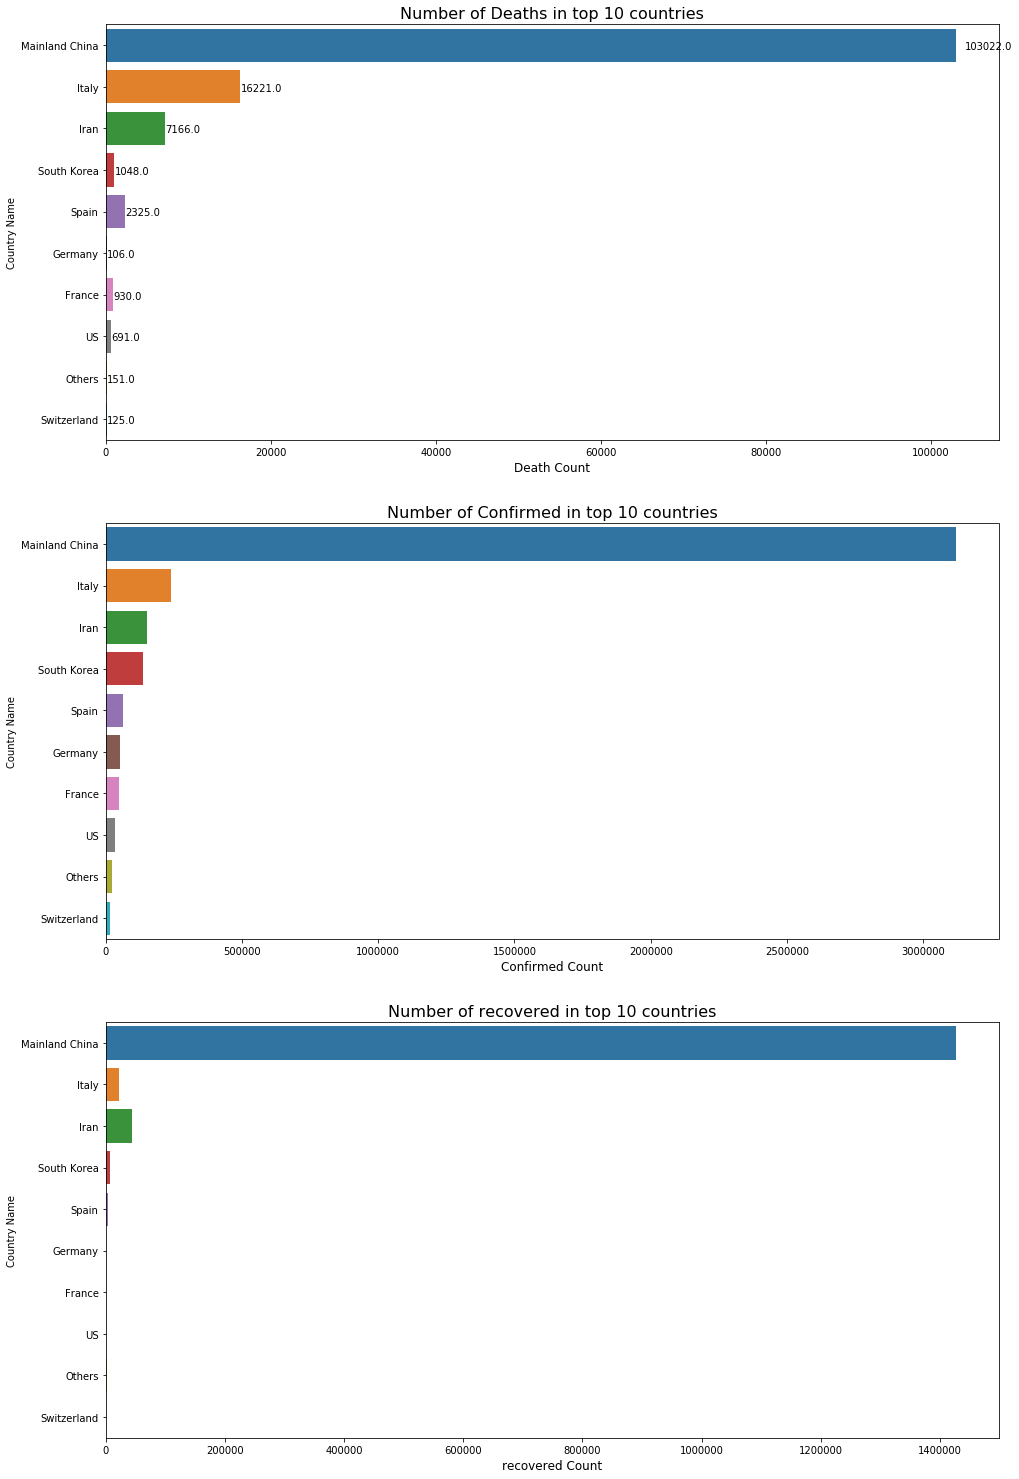

In [22]:
plt.figure(figsize=[16,26])
plt.subplot(311)
deaths=total['Deaths']
deaths=deaths[:10,]
deaths.index
sns.barplot(deaths.values , deaths.index )
for i,v in enumerate(deaths):
    plt.text(v*1.01, i+0.1, str(round(v,2)))

plt.title('Number of Deaths in top 10 countries',fontsize=16)
plt.ylabel('Country Name')
plt.xlabel('Death Count', fontsize=12)

plt.subplot(312)

confirmed=total['Confirmed']
confirmed=confirmed[:10,]
confirmed.index
sns.barplot(confirmed.values , confirmed.index )
plt.title('Number of Confirmed in top 10 countries',fontsize=16)
plt.ylabel('Country Name')
plt.xlabel('Confirmed Count', fontsize=12)

plt.subplot(313)

recovered=total['Recovered']
recovered=recovered[:10,]
recovered.index
sns.barplot(recovered.values , recovered.index )
plt.title('Number of recovered in top 10 countries',fontsize=16)
plt.ylabel('Country Name')
plt.xlabel('recovered Count', fontsize=12)

plt.show()

In [23]:
#countries with confirmed cases more that 10,000
total[total['Confirmed']>10000]

,Confirmed,Deaths,Recovered,Death Rate,Recovery Rate,Pending Cases
Country/Region,,,,,,
Mainland China,3120255.0,103022.0,1426808.0,3.301717,45.727288,1590425.0
Italy,238049.0,16221.0,21954.0,6.814143,9.222471,199874.0
Iran,150833.0,7166.0,43977.0,4.750950,29.156087,99690.0
South Korea,137889.0,1048.0,7443.0,0.760032,5.397820,129398.0
Spain,64917.0,2325.0,4398.0,3.581496,6.774805,58194.0
Germany,53846.0,106.0,770.0,0.196858,1.430004,52970.0
France,48017.0,930.0,318.0,1.936814,0.662265,46769.0
US,34411.0,691.0,362.0,2.008079,1.051989,33358.0
Others,22668.0,151.0,2894.0,0.666137,12.766896,19623.0


Text(0.5, 0, 'Confirmed Count')

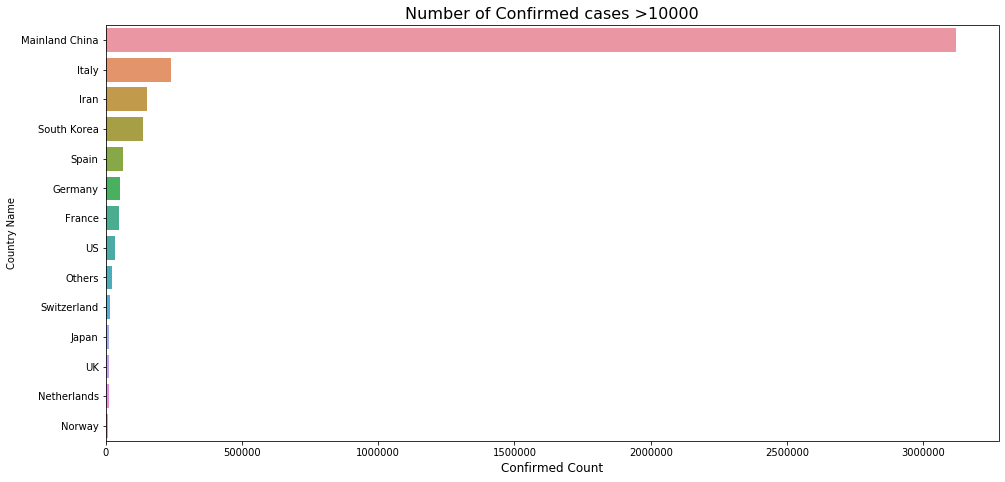

In [24]:
plt.figure(figsize=[16,26])
plt.subplot(311)
sns.barplot(total[total['Confirmed']>10000]['Confirmed'], total[total['Confirmed']>10000].index )
plt.title('Number of Confirmed cases >10000',fontsize=16)
plt.ylabel('Country Name')
plt.xlabel('Confirmed Count', fontsize=12)


Text(0.5, 0, 'Death Rate')

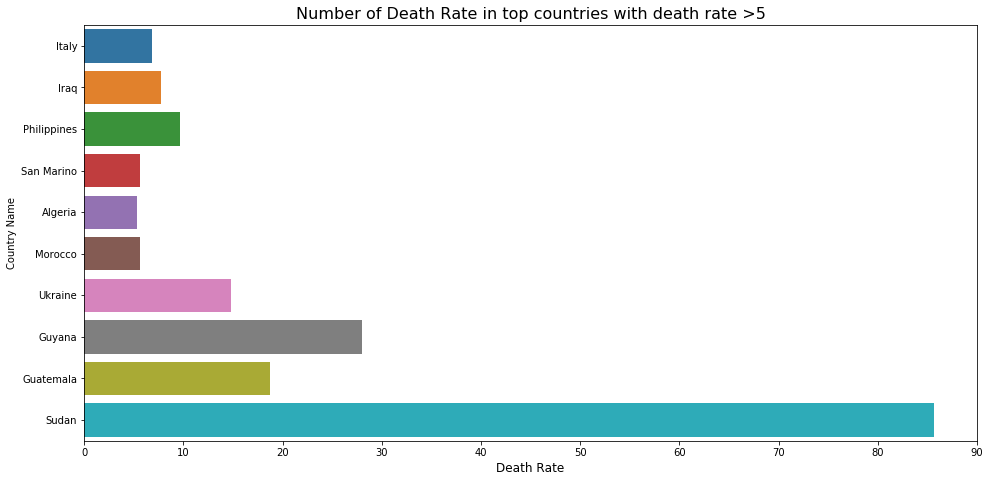

In [25]:
plt.figure(figsize=[16,26])
plt.subplot(311)
death_rate=total['Death Rate']
death_rate=death_rate[death_rate>5]
sns.barplot(death_rate.values , death_rate.index )

plt.title('Number of Death Rate in top countries with death rate >5',fontsize=16)
plt.ylabel('Country Name')
plt.xlabel('Death Rate', fontsize=12)


In [26]:
death_rate

Country/Region
Italy           6.814143
Iraq            7.770516
Philippines     9.660107
San Marino      5.654450
Algeria         5.274262
Morocco         5.641026
Ukraine        14.814815
Guyana         28.000000
Guatemala      18.750000
Sudan          85.714286
Name: Death Rate, dtype: float64

In [27]:
## data based on dates 

date_data=data.groupby(['ObservationDate']).sum()

In [28]:
date_data

,SNo,Confirmed,Deaths,Recovered,Day,Week,Month,WeekDay
ObservationDate,,,,,,,,
2020-01-22,566,555.0,17.0,28.0,638,116,29,58
2020-01-23,2158,653.0,18.0,30.0,851,148,37,111
2020-01-24,4188,941.0,26.0,36.0,960,160,40,160
2020-01-25,6490,1438.0,42.0,39.0,1100,176,44,220
2020-01-26,9071,2118.0,56.0,52.0,1222,188,47,282
2020-01-27,12342,2927.0,82.0,61.0,1377,255,51,0
2020-01-28,15262,5578.0,131.0,107.0,1456,260,52,52
2020-01-29,18711,6165.0,133.0,126.0,1566,270,54,108
2020-01-30,23345,8235.0,171.0,143.0,1740,290,58,174


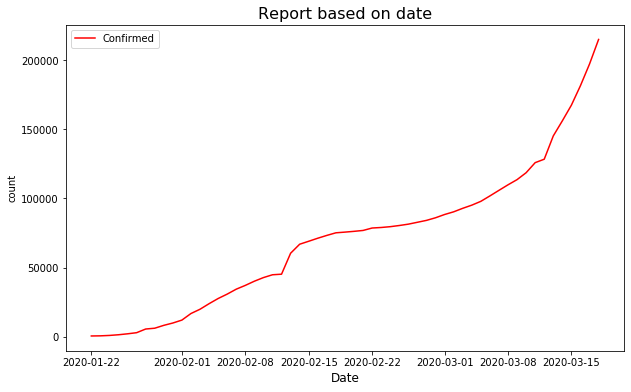

In [29]:
plt.figure(figsize=[10,6])
plt.plot(date_data.index, date_data['Confirmed'], color='red', label='Confirmed')
plt.title('Report based on date',fontsize=16)
plt.ylabel('count')
plt.xlabel('Date', fontsize=12)
plt.legend()
plt.show()

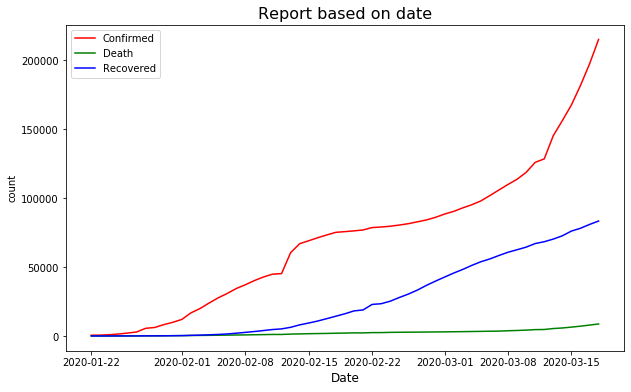

In [30]:
plt.figure(figsize=[10,6])
plt.plot(date_data.index, date_data['Confirmed'], color='red', label='Confirmed')
plt.plot(date_data.index, date_data['Deaths'],color='green', label='Death')
plt.plot(date_data.index, date_data['Recovered'],color='blue',label='Recovered')
plt.title('Report based on date',fontsize=16)
plt.ylabel('count')
plt.xlabel('Date', fontsize=12)
plt.legend()
plt.show()

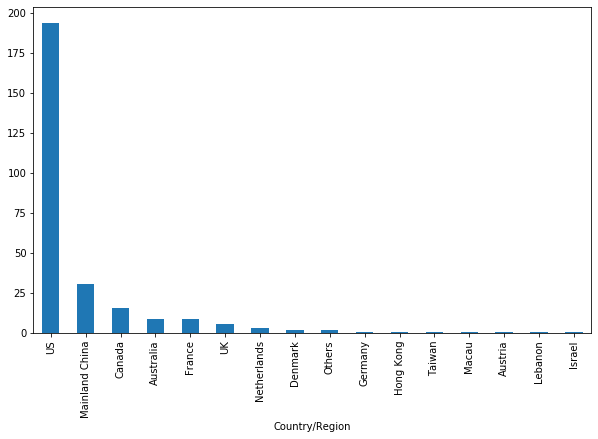

In [31]:
# number of provice affected for each country

plt.figure(figsize=[10,6])

province_report=data.groupby('Country/Region')['Province/State'].nunique().sort_values(ascending=False)
province_report=province_report[province_report>0]
province_report.plot(kind='bar')
plt.show()

In [32]:
data[data['Deaths']>0]['Province/State']

13               Hubei
47               Hebei
51               Hubei
84               Hubei
103       Heilongjiang
             ...      
6645               NaN
6647               NaN
6652               NaN
6681               NaN
6709    Cayman Islands
Name: Province/State, Length: 1884, dtype: object

In [33]:
data


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Day,Week,Month,WeekDay
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0,22,4,1,2
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0,22,4,1,2
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0,22,4,1,2
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0,22,4,1,2
5,6,2020-01-22,Guangdong,Mainland China,2020-01-22 17:00:00,26.0,0.0,0.0,22,4,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
6706,6707,2020-03-18,NaN,Togo,2020-03-13 22:22:02,1.0,0.0,0.0,18,12,3,2
6707,6708,2020-03-18,US,US,2020-03-18 19:33:03,1.0,0.0,106.0,18,12,3,2
6708,6709,2020-03-18,West Virginia,US,2020-03-17 23:33:02,1.0,0.0,0.0,18,12,3,2
6709,6710,2020-03-18,Cayman Islands,UK,2020-03-16 14:53:04,1.0,1.0,0.0,18,12,3,2


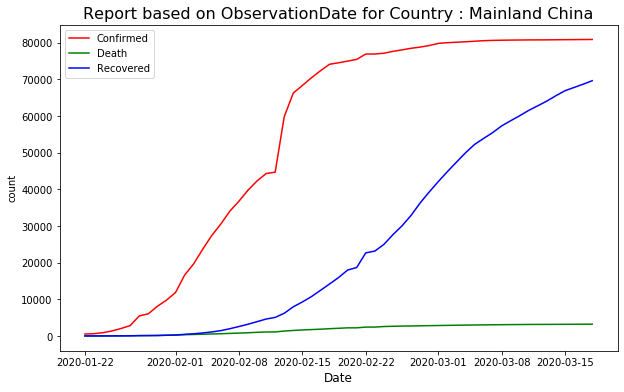

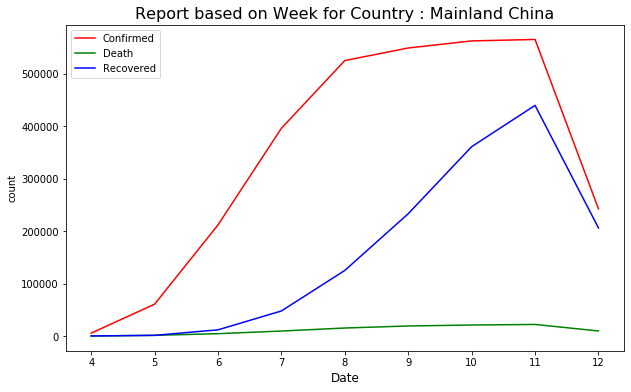

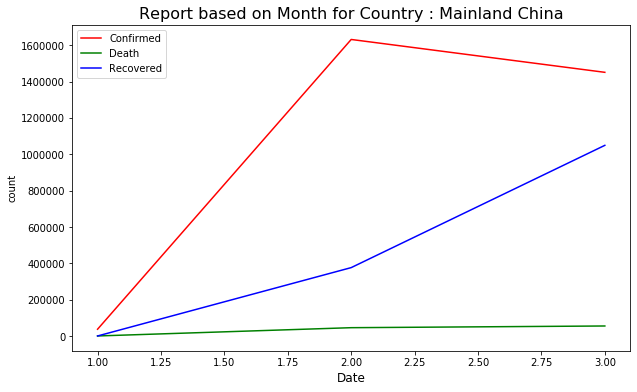

In [54]:
arr=['Confirmed','Recovered','Deaths']
def countires_results(country,observation):
    country_data=data[data['Country/Region']==country].groupby([observation]).sum()
    plt.figure(figsize=[10,6])
    plt.plot(country_data.index, country_data['Confirmed'], color='red', label='Confirmed')
    plt.plot(country_data.index, country_data['Deaths'],color='green', label='Death')
    plt.plot(country_data.index, country_data['Recovered'],color='blue',label='Recovered')
    plt.title('Report based on %s for Country : %s'%(observation,country),fontsize=16)
    plt.ylabel('count')
    plt.xlabel('Date', fontsize=12)
    plt.legend()
    plt.show()
    
        
for i in ['ObservationDate','Week','Month']:
    countires_results('Mainland China',i)


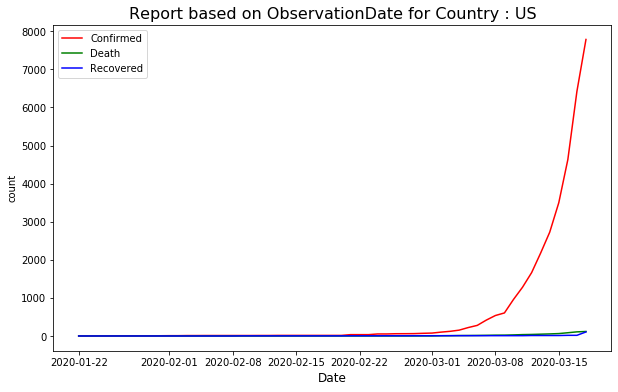

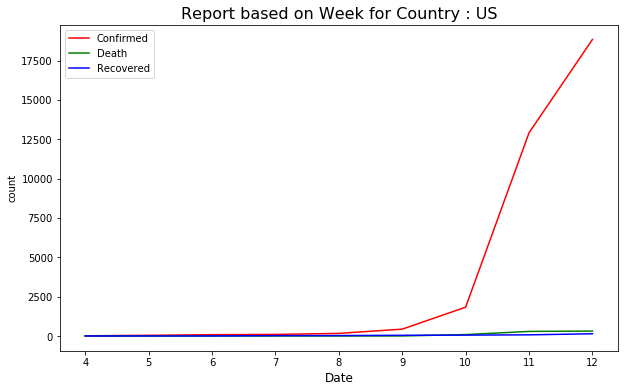

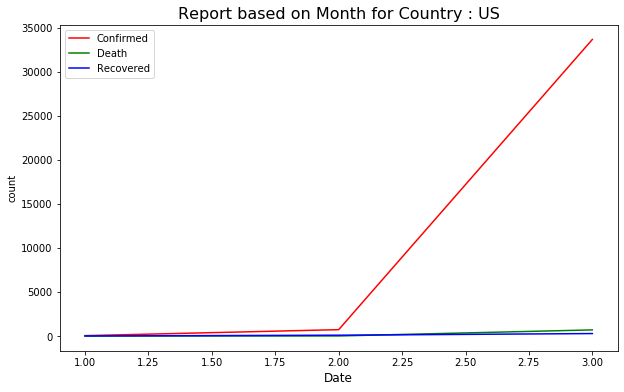

In [55]:
for i in ['ObservationDate','Week','Month']:
    countires_results('US',i)